# Welcome to NetworkX

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib notebook

Simple example

In [3]:
G = nx.Graph()

G.add_edge('A', 'B', weight=4)
G.add_edge('B', 'D', weight=2)
G.add_edge('A', 'C', weight=3)
G.add_edge('C', 'D', weight=4)

nx.shortest_path(G, 'A', 'D', weight='weight')

['A', 'B', 'D']

# Basic Graph Data Structures

 - `Graph`: Undirected Graphs
 - `DiGraph`: Directed Graphs
 - `MultiGraph`: Undirected multigraphs, ie graphs which allow for multiple edges between nodes
 - `MultiDiGraph`: Directed Multigraphs
 
Each of these has the same basic structure, attributes and features, with a few minor differences.

# Creating Graphs

In [2]:
G = nx.Graph()
D = nx.DiGraph()
M = nx.MultiGraph()
MD = nx.MultiDiGraph()

You can also add attributes to a graph during creation, either by providing a dictionary, or simply using keyword arguments

In [5]:
G = nx.Graph(date='2008-01-10', name="test")
G

In [6]:
type(G)

networkx.classes.graph.Graph

In [7]:
G.graph  # graph attribute

{'date': '2008-01-10', 'name': 'test'}

The graph attribute is just a dictionary, so you can add and delete more information from it.

In [8]:
G.graph['size'] = (5, 10)
del G.graph['date']

In [9]:
G.graph

{'name': 'test', 'size': (5, 10)}

## Nodes

### Adding Nodes

There are two main functions for adding nodes. `add_node`, and `add_nodes_from`. The former takes single values, and the latter takes any iterable (list, set, iterator, generator). Nodes can be of any _immutable_ type. This means numbers (ints and floats complex), strings, bytes, tuples or frozen sets. They cannot be _mutable_, such as lists, dictionaries or sets. Nodes in the same graph do not have to be of the same type

In [10]:
# Adding single nodes of various types
G.add_node(0)
G.add_node('A')
G.add_node(('x', 3.14))

# Adding collections of nodes
G.add_nodes_from([2,4,6])
G.add_nodes_from(set([i for i in range(10,13)]))

### Listing Nodes

In [13]:
G.nodes()  # networkx views are read-only, they are automatically updated and maintained

NodeView((0, 2, 4, 6, ('x', 3.14), 10, 11, 12, 'A'))

In [14]:
G.number_of_nodes()

9

Sometimes to save memory we might only want to access a list of nodes one at a time, so we can use an _iterator_.

In [15]:
for v in G.nodes():
    print(v)

0
2
4
6
('x', 3.14)
10
11
12
A


### Checking whether nodes are in a Graph

In [16]:
13 in G

False

In [17]:
10 in G

True

In [18]:
G.has_node('B')

False

In [19]:
G.has_node(('x', 3.14))

True

### Node attributes

You can also add attributes to nodes when you create new nodes using keyword arguments to the `add_node` and `add_nodes_from` function.

In [20]:
G.add_node('Spam', company='Hormel', food='meat')
G.nodes()

NodeView((0, 2, 4, 'Spam', 6, ('x', 3.14), 10, 11, 12, 'A'))

In [21]:
G.node['Spam']  # check node attributes

{'company': 'Hormel', 'food': 'meat'}

When using `add_nodes_from` you provide a tuple with the first element being the node, and the second being a dictionary of attributes for that node. You can also add attributes which will be applied to all added nodes using keyword arguments

In [22]:
G.add_nodes_from([('Bologna',{'company':'Oscar Meyer'}),
                  ('Bacon',{'company':'Wright'}),
                  ('Sausage',{'company':'Jimmy Dean'})],
                  food='meat'  # this attr will be applied to all added nodes
                )

In [23]:
G.nodes()

NodeView((0, 'Bologna', 2, 4, 6, 10, 11, 12, 'A', ('x', 3.14), 'Spam', 'Sausage', 'Bacon'))

To list node attributes you need to provide the `data=True` keyword to the `nodes` functions

In [24]:
G.nodes(data=True)  # list every node with its node attr

NodeDataView({0: {}, 'Bologna': {'company': 'Oscar Meyer', 'food': 'meat'}, 2: {}, 4: {}, 6: {}, 10: {}, 11: {}, 12: {}, 'A': {}, ('x', 3.14): {}, 'Spam': {'company': 'Hormel', 'food': 'meat'}, 'Sausage': {'company': 'Jimmy Dean', 'food': 'meat'}, 'Bacon': {'company': 'Wright', 'food': 'meat'}})

Attributes are stored in a special dictionary within the graph called `node` you can access, edit and remove attributes there

In [25]:
G.node['Spam']

{'company': 'Hormel', 'food': 'meat'}

In [26]:
G.node['Spam']['Delicious'] = True
G.node[6]['integer'] = True

In [27]:
G.nodes(data=True)

NodeDataView({0: {}, 'Bologna': {'company': 'Oscar Meyer', 'food': 'meat'}, 2: {}, 4: {}, 6: {'integer': True}, 10: {}, 11: {}, 12: {}, 'A': {}, ('x', 3.14): {}, 'Spam': {'Delicious': True, 'company': 'Hormel', 'food': 'meat'}, 'Sausage': {'company': 'Jimmy Dean', 'food': 'meat'}, 'Bacon': {'company': 'Wright', 'food': 'meat'}})

In [28]:
del G.node[6]['integer']  # remove node attr

In [29]:
G.nodes(data=True)

NodeDataView({0: {}, 'Bologna': {'company': 'Oscar Meyer', 'food': 'meat'}, 2: {}, 4: {}, 6: {}, 10: {}, 11: {}, 12: {}, 'A': {}, ('x', 3.14): {}, 'Spam': {'Delicious': True, 'company': 'Hormel', 'food': 'meat'}, 'Sausage': {'company': 'Jimmy Dean', 'food': 'meat'}, 'Bacon': {'company': 'Wright', 'food': 'meat'}})

Similiarly, you can remove nodes with the `remove_node` and `remove_nodes_from` functions

In [30]:
G.remove_node(6)
G.remove_nodes_from([10,11,12])

In [31]:
G.nodes()

NodeView((0, 'Bologna', 2, 4, 'A', ('x', 3.14), 'Spam', 'Sausage', 'Bacon'))

In [32]:
G.clear()  # clear the graph
G.nodes()

NodeView(())

### Exercises

#### Repeated Nodes

1. What happens when you add nodes to a graph that already exist? - nothing happens
2. What happens when you add nodes to the graph that already exist but have new attributes? - update?
3. What happens when you add nodes to a graph with attributes different from existing nodes? - overwrite?
4. Try removing a node that doesn't exist, what happens? - Traceback

#### The FizzBuzz Graph

Using the spaces provided below to make a new graph, `FizzBuzz`. Add nodes labeled 0 to 100 to the graph. Each node should have an attribute 'fizz' and 'buzz'. If the nodes label is divisble by 3 `fizz=True` if it is divisble by 5 `buzz=True`, otherwise both are false.

## Edges

Adding edges is similar to adding nodes. They can be added, using either `add_edge` or `add_edges_from`. They can also have attributes in the same way nodes can. If you add an edge that includes a node that doesn't exist it will create it for you

In [3]:
G.clear()

In [4]:
G.add_edge('Shanghai','Houston', distance=14000)
G.add_edge('Tokyo','Shanghai', distance=2000)
G.add_edge('Halifax','San Diego', distance=9000)

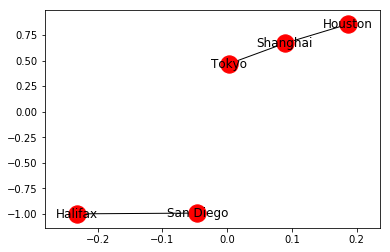

In [7]:
nx.draw_networkx(G)

In [8]:
G.number_of_edges()

3

In [9]:
G.nodes()

NodeView(('Shanghai', 'Halifax', 'Houston', 'San Diego', 'Tokyo'))

In [10]:
G.edges()

EdgeView([('Shanghai', 'Houston'), ('Shanghai', 'Tokyo'), ('Halifax', 'San Diego')])

In [11]:
G.add_edges_from([(i, i + 2) for i in range(2,8,2)])

In [13]:
G.nodes()

NodeView((2, 4, 6, 'Halifax', 8, 'Shanghai', 'Houston', 'San Diego', 'Tokyo'))

In [14]:
G.edges()

EdgeView([(2, 4), (4, 6), (6, 8), ('Halifax', 'San Diego'), ('Shanghai', 'Houston'), ('Shanghai', 'Tokyo')])

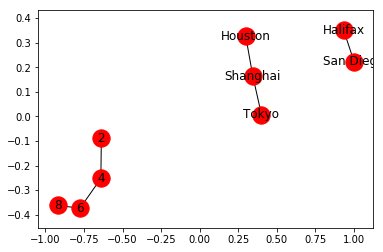

In [31]:
nx.draw_networkx(G)

In [32]:
G.edges(data=True)

EdgeDataView([(2, 4, {}), (4, 6, {}), (6, 8, {}), ('Halifax', 'San Diego', {'distance': 9000}), ('Shanghai', 'Houston', {'distance': 14000}), ('Shanghai', 'Tokyo', {'distance': 2000})])

Removing edges is accomplished by using the `remove_edge` or `remove_edges_from` function. Remove edge attributes can be done by indexing into the graph

In [33]:
G['Shanghai']['Houston']  # check edge attributes

{'distance': 14000}

In [34]:
del G['Shanghai']['Houston']['distance']

In [35]:
G['Shanghai']['Houston']

{}

In [36]:
G.remove_edge(2,4)  # removing edges will not remove nodes

In [37]:
G.edges(data=True)

EdgeDataView([(4, 6, {}), (6, 8, {}), ('Halifax', 'San Diego', {'distance': 9000}), ('Shanghai', 'Houston', {}), ('Shanghai', 'Tokyo', {'distance': 2000})])

In [39]:
G.nodes()

NodeView((2, 4, 6, 'Halifax', 8, 'Shanghai', 'Houston', 'San Diego', 'Tokyo'))

You can check for the existance of edges with `has_edge`

In [40]:
G.has_edge(2,4)

False

In [41]:
G.has_edge('Shanghai','Tokyo')

True

For directed graphs, ordering matters. `add_edge(u,v)` will add an edge from `u` to `v`

In [42]:
D.add_nodes_from(range(10))
D

In [43]:
D.graph

{}

In [44]:
D.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [45]:
D.edges()

OutEdgeView([])

In [46]:
D.add_edges_from([(i, (i + 1) % 10) for i in range(0,10)])  # make a circle

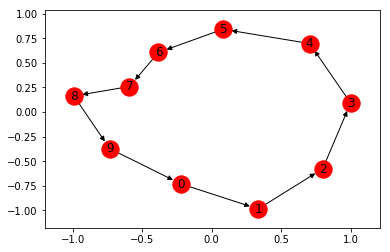

In [49]:
nx.draw_networkx(D)

In [50]:
D.clear()
D.add_cycle(range(0,10))  # shortcut for making a circle

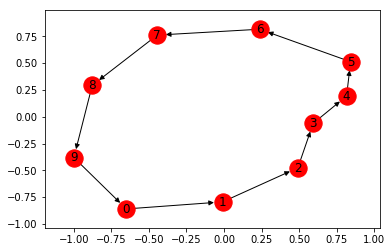

In [51]:
nx.draw_networkx(D)

In [52]:
D.edges()

OutEdgeView([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 0)])

In [53]:
D.has_edge(0,1)

True

In [54]:
D.has_edge(1,0)

False

You can also access edges for only a subset of nodes by passing edges a collection of nodes

In [55]:
D.edges([3,4,5])  # find edges in a directed graph with heads in [3,4,5]

OutEdgeDataView([(3, 4), (4, 5), (5, 6)])

## Multigraphs

Multigraphs can have multiple edges between any two nodes. They are referenced by a key.

In [56]:
M.add_edge(0,1)
M.add_edge(0,1)

1

In [57]:
M.edges()

MultiEdgeDataView([(0, 1), (0, 1)])

The keys of the edges can be accessed by using the keyword `keys=True`. This will give a tuple of `(u,v,k)`, with the edge being `u` and `v` and the key being `k`.

In [58]:
M.edges(keys=True)

MultiEdgeView([(0, 1, 0), (0, 1, 1)])

`MultiGraphs` and `MultiDiGraphs` are similar to `Graphs` and `DiGraphs` in most respects

## Adding Graph Motifs

In addition to adding nodes and edges one at a time networkx has some convenient functions for adding complete subgraphs. But beware, these may be removed, or the API changed in the future.

In [59]:
G.edges()

EdgeView([(4, 6), (6, 8), ('Halifax', 'San Diego'), ('Shanghai', 'Houston'), ('Shanghai', 'Tokyo')])

In [60]:
G.add_cycle(range(100,110))

In [62]:
G.edges()

EdgeView([(107, 106), (107, 108), (100, 101), (100, 109), (101, 102), (6, 8), (6, 4), ('Halifax', 'San Diego'), ('Shanghai', 'Houston'), ('Shanghai', 'Tokyo'), (106, 105), (103, 104), (103, 102), (108, 109), (104, 105)])

# Basic Graph Properties

## Node and Edge Counts

The _order_ of a graph is the number of nodes, it can be accessed by calling `G.order()` or using the builtin length function: `len(G)`.

In [65]:
print(G.nodes())

[2, 107, 100, 101, 6, 'Halifax', 8, 'Shanghai', 106, 103, 108, 'San Diego', 'Tokyo', 104, 109, 105, 4, 'Houston', 102]


In [66]:
G.order()  # n

19

In [67]:
len(G)

19

The number of edges is usually referred to as the _size_ of the graph, and can be accessed by `G.size()`. You could also find out by calling `len(G.edges())`, but this is much slower.

In [68]:
print(G.edges())

[(107, 106), (107, 108), (100, 101), (100, 109), (101, 102), (6, 8), (6, 4), ('Halifax', 'San Diego'), ('Shanghai', 'Houston'), ('Shanghai', 'Tokyo'), (106, 105), (103, 104), (103, 102), (108, 109), (104, 105)]


In [69]:
G.size()

15

For multigraphs it counts the number of edges including multiplicity

In [70]:
M.edges(keys=True)

MultiEdgeView([(0, 1, 0), (0, 1, 1)])

In [71]:
M.size()

2

## Node Neighbors

Node neighbors can be accessed via the `neighbors` 

In [72]:
G.neighbors('Shanghai')

In [73]:
list(G.neighbors('Shanghai'))

['Houston', 'Tokyo']

In the case of directed graphs, neighbors are only those originating at the node.

In [74]:
D.add_edges_from([(0,i) for i in range(5,10)])
D.neighbors(0)

In [75]:
list(D.neighbors(0))

[1, 5, 6, 7, 8, 9]

For multigraphs, neighbors are only reported once.

In [76]:
list(M.neighbors(0))

[1]

## Degree

The degree of a graph can be found using the `degree` function for undirected graphs, and `in_degree` and `out_degree` for directed graphs. They both return a dictionary with the node as the keys of the dictionary and the degree as the value

In [77]:
G.degree()

DegreeView({2: 0, 100: 2, 101: 2, 6: 2, 'Halifax': 1, 8: 1, 'Shanghai': 2, 106: 2, 107: 2, 108: 2, 'San Diego': 1, 'Tokyo': 1, 104: 2, 102: 2, 105: 2, 4: 1, 103: 2, 'Houston': 1, 109: 2})

In [78]:
D.in_degree()

InDegreeView({0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2})

In [79]:
D.out_degree()

OutDegreeView({0: 6, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1})

Both of these can be called on a single node or a subset of nodes if not all degrees are needed

In [80]:
D.in_degree(5)

2

In [81]:
D.out_degree([0,1,2])

OutDegreeView({0: 6, 1: 1, 2: 1})

You can also calculate weighted degree. To do this each edge has to have specific attribute to be used as a weight.

In [82]:
WG = nx.Graph(name='Weighted Graph')

In [83]:
WG.graph

{'name': 'Weighted Graph'}

In [86]:
WG.add_star(range(5))
WG.add_star(range(5,10))

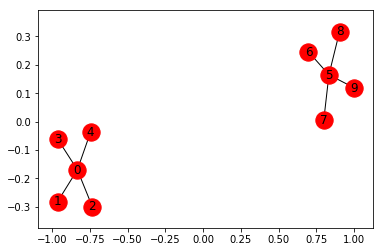

In [87]:
nx.draw_networkx(WG)

In [88]:
WG.add_edges_from([(i, 2 * i % 10) for i in range(10)])

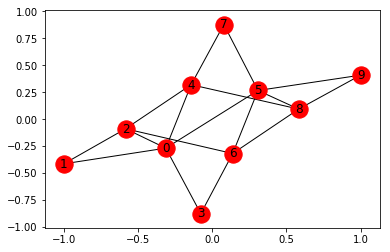

In [89]:
nx.draw_networkx(WG)

In [90]:
WG.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [91]:
WG.edges()

EdgeView([(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (2, 4), (2, 6), (3, 6), (4, 8), (4, 7), (5, 8), (5, 9), (5, 6), (5, 7), (6, 8), (8, 9)])

In [92]:
for (u,v) in WG.edges():
    WG[u][v]['product'] = (u + 1) * (v + 1)  # add edge attribute

In [93]:
WG.degree(weight='product')  # for weighted graphs, the degree of a node is the sum of its edge weights.

DegreeView({0: 22, 1: 8, 2: 45, 3: 32, 4: 105, 5: 210, 6: 154, 7: 88, 8: 252, 9: 150})